<a href="https://colab.research.google.com/github/maycmesquia/Tool_Box/blob/main/Portal_da_Transparencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação e Contatos!

- Nome: Maycon Mendes de Mesquita

- E-mail: maycmesquita@gmail.com

- Kaggle: https://www.kaggle.com/maycondsmendes

- Linkedin: https://www.linkedin.com/in/maycon-douglas-data-science/

- Github: https://github.com/maycmesquia

- Twitter: https://twitter.com/MayconMMesquita

# Situação Proposta:

Utilizando os dados abertos do portal CEAPS (Cota para Exercicio de Atividade Parlamentar) do portal da transparencia ([clique aqui!](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes)), iremos baixar e limpar os dados dos anos 2019, 2020 e 2021 e posterior faremos uma verificação de como foi o gasto dos senadores no ano de 2020 (ano atipico, onde houve as medidas de enfrentamento da pandemia do COVID-19).



# Desafio 1: Limpando a base de dados.

----
Preparando o ambiente, importando bibliotecas.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()
sns.set_style('darkgrid')

---
Iremos importar os dados dos anos 2015 a 2021, e alterarmos as suas configurações.

In [27]:
end = '/content/drive/MyDrive/Colab Notebooks/Alura 7 dias de Data Scienc/Portal da Transparencia/'

df_2015 = pd.read_csv(end + 'despesa_ceaps_2015.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2016 = pd.read_csv(end + 'despesa_ceaps_2016.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2017 = pd.read_csv(end + 'despesa_ceaps_2017.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2018 = pd.read_csv(end + 'despesa_ceaps_2018.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2019 = pd.read_csv(end + 'despesa_ceaps_2019.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2020 = pd.read_csv(end + 'despesa_ceaps_2020.csv', sep=';', encoding='ISO-8859-1', header=1)
df_2021 = pd.read_csv(end + 'despesa_ceaps_2021.csv', sep=';', encoding='ISO-8859-1', header=1)

df_ceaps = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021])
df_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156871 entries, 0 to 16807
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                156871 non-null  int64  
 1   MES                156871 non-null  int64  
 2   SENADOR            156871 non-null  object 
 3   TIPO_DESPESA       156871 non-null  object 
 4   CNPJ_CPF           156871 non-null  object 
 5   FORNECEDOR         156871 non-null  object 
 6   DOCUMENTO          146212 non-null  object 
 7   DATA               156871 non-null  object 
 8   DETALHAMENTO       112622 non-null  object 
 9   VALOR_REEMBOLSADO  156871 non-null  object 
 10  COD_DOCUMENTO      156869 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 14.4+ MB


---
Vamos ver os dados que cada feature representa.

In [28]:
df_ceaps

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,647777,14/01/2015,NaN,"52,34",2000857.0
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,000647776,18/01/2015,Despesa com pagamento de energia elétrica para...,"168,17",2001140.0
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000,2001144.0
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,19/01/2015,Despesa com pagamento de telefonia para uso do...,"416,95",2001141.0
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,14654,09/01/2015,Despesa com material de consumo para uso do es...,"108,5",2001139.0
...,...,...,...,...,...,...,...,...,...,...,...
16803,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...","1715,45",2170983.0
16804,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...","2489,29",2172263.0
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...","1486,66",2172717.0
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...","2515,56",2173239.0


---
Agora que unimos todas as informações, vamos ver quais são os tipos de dados de cada coluna.

In [29]:
df_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156871 entries, 0 to 16807
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                156871 non-null  int64  
 1   MES                156871 non-null  int64  
 2   SENADOR            156871 non-null  object 
 3   TIPO_DESPESA       156871 non-null  object 
 4   CNPJ_CPF           156871 non-null  object 
 5   FORNECEDOR         156871 non-null  object 
 6   DOCUMENTO          146212 non-null  object 
 7   DATA               156871 non-null  object 
 8   DETALHAMENTO       112622 non-null  object 
 9   VALOR_REEMBOLSADO  156871 non-null  object 
 10  COD_DOCUMENTO      156869 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 14.4+ MB


-------------
Precisamos alterar algumas colunas para que o formato em que elas estão seja o melhor para podermos trabalhar com as informaçoes contidas nelas.

---------------
Aparentemente algumas linhas foram mal preenchidas, não seguiram a sequancia de separação por colunas corretas, com isso irei altera-las por aqui.

- linha 5922 - Foi inserido na coluna documento o codigo desse documento assim como tambem a sua data.

In [30]:
df_ceaps.iloc[5922]

ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                      SEM FATURA";02/08/2015"
DATA                 Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...
DETALHAMENTO                                                    469,53
VALOR_REEMBOLSADO                                              2014675
COD_DOCUMENTO                                                      NaN
Name: 5922, dtype: object

In [31]:
df_ceaps['COD_DOCUMENTO'].iloc[5922] = str(int(df_ceaps['VALOR_REEMBOLSADO'].iloc[5922]))
df_ceaps['VALOR_REEMBOLSADO'].iloc[5922] = df_ceaps['DETALHAMENTO'].iloc[5922]
df_ceaps['DETALHAMENTO'].iloc[5922] = df_ceaps['DATA'].iloc[5922]
df_ceaps['DATA'].iloc[5922] = '02/08/2015'
df_ceaps['DOCUMENTO'].iloc[5922] = 'SEM FATURA'

df_ceaps.iloc[5922]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                                   SEM FATURA
DATA                                                        02/08/2015
DETALHAMENTO         Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...
VALOR_REEMBOLSADO                                               469,53
COD_DOCUMENTO                                                  2014675
Name: 5922, dtype: object

In [32]:
df_ceaps.iloc[5929]

ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                    ¨¨SEM FATURA";17/08/2015"
DATA                 Companhia Aérea: AVIANCA, Localizador: ZNEU9F....
DETALHAMENTO                                                    460,45
VALOR_REEMBOLSADO                                              2016557
COD_DOCUMENTO                                                      NaN
Name: 5929, dtype: object

In [33]:
df_ceaps['COD_DOCUMENTO'].iloc[5929] = str(int(df_ceaps['VALOR_REEMBOLSADO'].iloc[5929]))
df_ceaps['VALOR_REEMBOLSADO'].iloc[5929] = df_ceaps['DETALHAMENTO'].iloc[5929]
df_ceaps['DETALHAMENTO'].iloc[5929] = df_ceaps['DATA'].iloc[5929]
df_ceaps['DATA'].iloc[5929] = '17/08/2015'
df_ceaps['DOCUMENTO'].iloc[5929] = 'SEM FATURA'

df_ceaps.iloc[5929]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                                   SEM FATURA
DATA                                                        17/08/2015
DETALHAMENTO         Companhia Aérea: AVIANCA, Localizador: ZNEU9F....
VALOR_REEMBOLSADO                                               460,45
COD_DOCUMENTO                                                  2016557
Name: 5929, dtype: object

In [34]:
df_ceaps.iloc[10358]

ANO                                                               2015
MES                                                                 10
SENADOR                                             JOÃO ALBERTO SOUZA
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            16.978.175/0001-08
FORNECEDOR                                ADRIA VIAGENS E TURISMO LTDA
DOCUMENTO                                                          NaN
DATA                                                        06/10/2915
DETALHAMENTO         Companhia Aérea: GOL, Localizador: HF2VJM. Pas...
VALOR_REEMBOLSADO                                               993,46
COD_DOCUMENTO                                                2029364.0
Name: 10358, dtype: object

In [35]:
df_ceaps['DATA'].iloc[10358] = '06/10/2015'
df_ceaps.iloc[10358]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ANO                                                               2015
MES                                                                 10
SENADOR                                             JOÃO ALBERTO SOUZA
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            16.978.175/0001-08
FORNECEDOR                                ADRIA VIAGENS E TURISMO LTDA
DOCUMENTO                                                          NaN
DATA                                                        06/10/2015
DETALHAMENTO         Companhia Aérea: GOL, Localizador: HF2VJM. Pas...
VALOR_REEMBOLSADO                                               993,46
COD_DOCUMENTO                                                2029364.0
Name: 10358, dtype: object

------------
Formatando a coluna de valor reembolsado.

In [36]:
df_ceaps['VALOR_REEMBOLSADO'] = df_ceaps['VALOR_REEMBOLSADO'].str.replace(',', '.').astype(float)
df_ceaps

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,647777,14/01/2015,NaN,52.34,2000857.0
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,000647776,18/01/2015,Despesa com pagamento de energia elétrica para...,168.17,2001140.0
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000.00,2001144.0
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,19/01/2015,Despesa com pagamento de telefonia para uso do...,416.95,2001141.0
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,14654,09/01/2015,Despesa com material de consumo para uso do es...,108.50,2001139.0
...,...,...,...,...,...,...,...,...,...,...,...
16803,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...",1715.45,2170983.0
16804,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...",2489.29,2172263.0
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...",1486.66,2172717.0
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...",2515.56,2173239.0


-----------------
Outro ajuste que será necessario é o da data que não está no formato padrão de data (aaaa-mm-dd).

In [37]:
%%time
df_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156871 entries, 0 to 16807
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                156871 non-null  int64  
 1   MES                156871 non-null  int64  
 2   SENADOR            156871 non-null  object 
 3   TIPO_DESPESA       156871 non-null  object 
 4   CNPJ_CPF           156871 non-null  object 
 5   FORNECEDOR         156871 non-null  object 
 6   DOCUMENTO          146212 non-null  object 
 7   DATA               156871 non-null  object 
 8   DETALHAMENTO       112622 non-null  object 
 9   VALOR_REEMBOLSADO  156871 non-null  float64
 10  COD_DOCUMENTO      156871 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 14.4+ MB
CPU times: user 78.6 ms, sys: 0 ns, total: 78.6 ms
Wall time: 80.4 ms


In [39]:
%%time
df_ceaps['DATA_AJUSTADA'] = pd.Series(0)

for linha in range(0, len(df_ceaps.index)):
        df_ceaps['DATA_AJUSTADA'].iloc[linha] = str(str(df_ceaps['ANO'].iloc[linha]) + '-' + str(df_ceaps['MES'].iloc[linha]) + '-' + df_ceaps['DATA'].iloc[linha][0:2])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


CPU times: user 1min 42s, sys: 654 ms, total: 1min 43s
Wall time: 1min 43s


In [40]:
end = '/content/drive/MyDrive/Colab Notebooks/Alura 7 dias de Data Scienc/Portal da Transparencia/'

df_ceaps.to_csv(end + 'ceaps.csv')

In [41]:
df_ceaps

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_AJUSTADA
0,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,647777,14/01/2015,NaN,52.34,2000857.0,2015-1-14
1,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,000647776,18/01/2015,Despesa com pagamento de energia elétrica para...,168.17,2001140.0,2015-1-18
2,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/15,30/01/2015,Despesa com pagamento de aluguel de imóvel par...,5000.00,2001144.0,2015-1-30
3,2015,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,556241490,19/01/2015,Despesa com pagamento de telefonia para uso do...,416.95,2001141.0,2015-1-19
4,2015,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,07.170.542/0001-51,INK JET INFORMATICA E PAPELARIA LTDA EPP,14654,09/01/2015,Despesa com material de consumo para uso do es...,108.50,2001139.0,2015-1-09
...,...,...,...,...,...,...,...,...,...,...,...,...
16803,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...",1715.45,2170983.0,2021-12-01
16804,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...",2489.29,2172263.0,2021-12-15
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...",1486.66,2172717.0,2021-12-17
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...",2515.56,2173239.0,2021-12-27


# Desafio 2: Visualizando os dados.



Vamos ver quais os senadores que tiveram o maior gasto de cota parlamentar no acumulado dos anos.

In [ ]:
df.sort_values(by=['col1','col2'], ascending=False)

In [46]:
df_ceaps[['VALOR_REEMBOLSADO', 'SENADOR']].groupby(by='SENADOR').sum().sort_values(by='VALOR_REEMBOLSADO', ascending=False)

,VALOR_REEMBOLSADO
SENADOR,
PAULO ROCHA,3160747.14
TELMÁRIO MOTA,3063784.93
SÉRGIO PETECÃO,3027990.82
DAVI ALCOLUMBRE,2902320.04
CIRO NOGUEIRA,2889790.31
...,...
MÁRIO COUTO,4016.60
GILBERTO PISELO,3923.04
MARCO ANTÔNIO COSTA,2746.55


In [47]:
df_ceaps[df_ceaps['SENADOR']=='PAULO ROCHA']

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_AJUSTADA
18501,2015,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",04.945.341/0001-90,COSANPA,001/2015-4,23/02/2015,Conta de água do escritório de apoio.,192.42,2013072.0,2015-2-23
18502,2015,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,Equatorial Pará Distribuidora de Energia S.A.,00120153561355017,11/02/2015,Conta de energia elétrica do escritório de apoio,1647.13,2013073.0,2015-2-11
18503,2015,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",033.249.072-68,Mariza Machado da Silva Lima,001/2015,28/02/2015,Valor referente ao aluguel do mês de Fevereiro...,6500.00,2002290.0,2015-2-28
18504,2015,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",00.108.786/0001-65,NET Serviços de comunicação S. A.,01503920559830,09/03/2015,Combo: acesso à internet e telefone,329.88,2013523.0,2015-2-09
18505,2015,2,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,Telefônica do Brasil S.A.,NaN,12/02/2015,Telefone celular,809.11,2013075.0,2015-2-12
...,...,...,...,...,...,...,...,...,...,...,...,...
12527,2021,12,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,HEVVJO,05/12/2021,"Companhia Aérea: LATAM, Localizador: HEVVJO. P...",2091.85,2171492.0,2021-12-05
12528,2021,12,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,GDJCXI,07/12/2021,"Companhia Aérea: LATAM, Localizador: GDJCXI. P...",2090.12,2171874.0,2021-12-07
12529,2021,12,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,MXAMMF,07/12/2021,"Companhia Aérea: LATAM, Localizador: MXAMMF. P...",2575.96,2171993.0,2021-12-07
12530,2021,12,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,IXQYIW,14/12/2021,"Companhia Aérea: LATAM, Localizador: IXQYIW. P...",1793.12,2172254.0,2021-12-14


In [ ]:
ax, graficos = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

graficos[0].set_title('Paulo Rocha')
sns.catplot(data=df_ceaps[df_ceaps['SENADOR']=='PAULO ROCHA'], x='ANO',y='VALOR_REEMBOLSADO', kind="bar", ax=graficos[0])

graficos[1].set_title('Telmario Mota')
sns.catplot(data=df_ceaps[df_ceaps['SENADOR']=='TELMÁRIO MOTA'], x='ANO',y='VALOR_REEMBOLSADO', kind="bar", ax=graficos[1])

graficos[2].set_title('Sergio Petecao')
sns.catplot(data=df_ceaps[df_ceaps['SENADOR']=='SÉRGIO PETECÃO'], x='ANO',y='VALOR_REEMBOLSADO', kind="bar", ax=graficos[2])

plt.show()

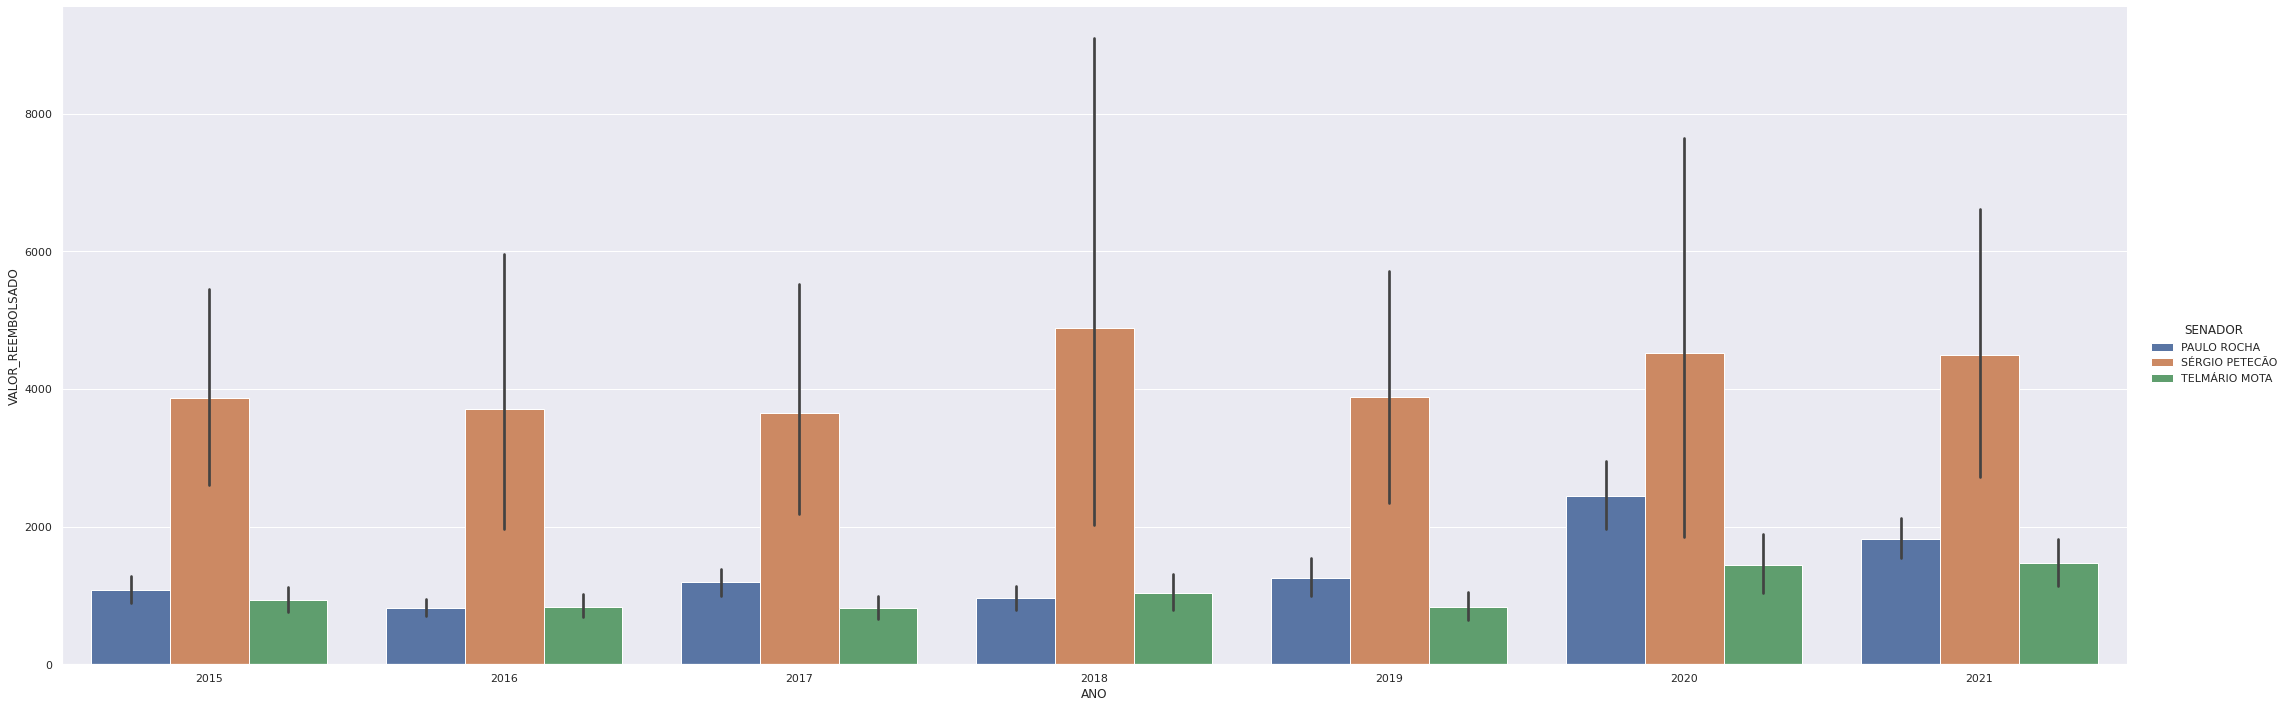

In [77]:
filtro = df_ceaps[(df_ceaps['SENADOR']=='PAULO ROCHA') | (df_ceaps['SENADOR']=='TELMÁRIO MOTA') | (df_ceaps['SENADOR']=='SÉRGIO PETECÃO')]
sns.catplot(data=filtro, x='ANO',y='VALOR_REEMBOLSADO', kind="bar", hue='SENADOR', height = 10, aspect = 3)